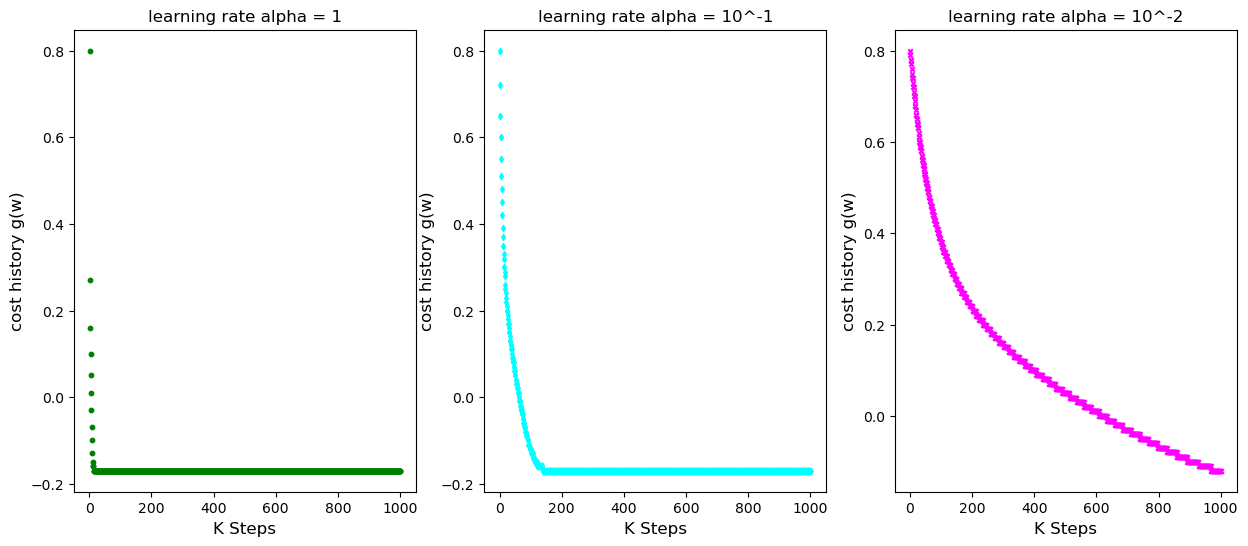

In [1]:
# problem 3.5 Watt, et. al.:
# gradient descent for a custom function and varying the step length alpha = 1, 10^-1 and 10^-2

import numpy as np
import matplotlib.pyplot as plt
import math
import time
from matplotlib import cm
import copy
# import automatic differentiator to compute gradient module
from autograd import grad
from PIL import Image
from scipy.signal import find_peaks
import itertools
from user_functions import *

from autograd import numpy as np
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent_custom(g,alpha_choice,max_its,w):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    #gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        grad_eval = grad_hand(w)
        cost_eval = g(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

# objective_function
g = lambda w: (1/50)*(w**4 + w**2 + 10*w)

# gradient function hand calculated
grad_hand = lambda w: (1/50)*(4*w**3 +2*w + 10)

# main function
# run gradient descent
alpha = 1; w = 2; max_its = 1000;
weight_history_1,cost_history_1 = gradient_descent_custom(g,alpha,max_its,w)
weights_steps_x_1 = np.array(weight_history_1)

alpha = 10**(-1); w = 2; max_its = 1000;
weight_history_2,cost_history_2 = gradient_descent_custom(g,alpha,max_its,w)
weights_steps_x_2 = np.array(weight_history_2)

alpha = 10**(-2); w = 2; max_its = 1000;
weight_history_3,cost_history_3 = gradient_descent_custom(g,alpha,max_its,w)
weights_steps_x_3 = np.array(weight_history_3)

# plotting the plots
#color
color = ['green']
s = [10]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
k_steps_1 = list(range(1,len(cost_history_1)+1))
cost_history_1_rounded = [round(val, 2) for val in cost_history_1]
#ax1.plot(k_steps_1, cost_history_1_rounded, 'k')
ax1.set_xlabel('K Steps', fontsize=12)
ax1.set_ylabel('cost history g(w)', fontsize=12)
#ax1.set_yscale('log')
ax1.scatter(k_steps_1,cost_history_1_rounded,marker='o', s = s,c= color)
ax1.set_title(f'learning rate alpha = 1')
color = ['cyan']
k_steps_2 = list(range(1,len(cost_history_2)+1))
cost_history_2_rounded = [round(val, 2) for val in cost_history_2]
#ax2.plot(k_steps_2, cost_history_2_rounded, 'k')
ax2.set_xlabel('K Steps', fontsize=12)
ax2.set_ylabel('cost history g(w)', fontsize=12)
#ax2.set_yscale('log')
ax2.scatter(k_steps_2,cost_history_2_rounded,marker='d', s = s,c= color)
ax2.set_title(f'learning rate alpha = 10^-1')
color = ['magenta']
k_steps_3 = list(range(1,len(cost_history_3)+1))
cost_history_3_rounded = [round(val, 2) for val in cost_history_3]
#ax2.plot(k_steps_3, cost_history_3_rounded, 'k')
ax3.set_xlabel('K Steps', fontsize=12)
ax3.set_ylabel('cost history g(w)', fontsize=12)
#ax3.set_yscale('log')
ax3.scatter(k_steps_3,cost_history_3_rounded,marker='x', s = s,c= color)
ax3.set_title(f'learning rate alpha = 10^-2')
#for i, txt in enumerate(zip(k_steps, cost_history_1_rounded)):
#        ax1.annotate(txt, (k_steps[i], cost_history_1_rounded[i]))
#r_min = -5; r_max = 5
#plt.figure(figsize=(10,5))
#x = np.arange(r_min,r_max,0.01)
#plt.plot(x, g(x), 'k-')
#plt.xlabel('step k', fontsize=12)
#plt.ylabel(r'$g(w^k)$', fontsize=12)
#plt.xlim(-5,5)
#plt.figure(figsize=(10,5))
#plt.plot(x, g(x), 'k-')
#plt.plot(weight_history_1, cost_history_1, 'gx')
#plt.quiver(weights_steps_x_1[:-1], np.zeros(weights_steps_x_1[:-1].shape[0]), weights_steps_x_1[1:]-weights_steps_x_1[:-1], \
#    np.zeros(weights_steps_x_1[1:].shape[0]), scale_units='xy', angles='xy', scale=1, color='g')
#plt.plot(weight_history_2, cost_history_2, 'rd')
#plt.quiver(weights_steps_x_2[:-1], np.zeros(weights_steps_x_2[:-1].shape[0]), weights_steps_x_2[1:]-weights_steps_x_2[:-1], \
#    np.zeros(weights_steps_x_2[1:].shape[0]), scale_units='xy', angles='xy', scale=1, color='r')
#plt.plot(weight_history_3, cost_history_3, 'bs')
#plt.quiver(weights_steps_x_3[:-1], np.zeros(weights_steps_x_3[:-1].shape[0]), weights_steps_x_3[1:]-weights_steps_x_3[:-1], \
#    np.zeros(weights_steps_x_3[1:].shape[0]), scale_units='xy', angles='xy', scale=1, color='b')
#plt.plot(weights_steps_x_1[-1], g(weights_steps_x_1[-1]), 'xy', markersize=3)
#plt.plot(weights_steps_x_2[-1], g(weights_steps_x_2[-1]), 'dy', markersize=3)
#plt.plot(weights_steps_x_3[-1], g(weights_steps_x_3[-1]), '*y', markersize=7)
#plt.plot(weights_steps_x_1[-1], 0, 'xy', markersize=7)
#plt.plot(weights_steps_x_2[-1], 0, 'dy', markersize=7)
##plt.plot(weights_steps_x_3[-1], 0, '*y', markersize=7)
#plt.xlabel('step k', fontsize=12)
#plt.ylabel(r'$g(w^k)$', fontsize=12)
#plt.xlim(-5,5)
plt.show()
